#### Harvard University Extension School
#### Wearable Devices and Computer Vision 
#### by Jose Luis Ramirez Herran 

#### Artin Bogdanov
#### Mariam Gogia

#### Summer 2020

# AirGesture
### Data collection, visualization, and cleaning. 
### Model development, training & testing. 

#####  Pandas and Numpy for data collection and manipulation. 
##### Matplotlib library for data visualization and pattern exploration. 
##### Skilearn library for Convolutional Neural Network model. 

In [33]:
# data structure and manipulation
import pandas as pd
import numpy as np 

# data visualization
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# files and time 
import csv
import sys
import time
import datetime as dt

In [34]:
# import data
file = 'swipe_right_27.csv'
df = pd.read_csv(file)
df.head(100)
# df.tail(50)

,id,r,theta,phi,acc_x,acc_y,acc_z,abs_a,g_x,g_y,...,delta_phi,delta_acc_x,delta_acc_y,delta_acc_z,delta_abs_acc,delta_g_x,delta_g_y,delta_g_z,delta_abs_g,label
0,1,716.224,10.156,-100.954,-24,-124,705,716.224,52990,65520,...,0.000,0,0,0,0.000,0,0,0,0,0
1,2,1181.133,8.552,-172.146,-174,-24,1168,1181.133,-14280,1260,...,-71.192,-150,100,1292,464.909,-67270,-64260,35700,-25905,0
2,3,993.902,5.693,-53.246,59,-79,989,993.902,-3920,-29820,...,118.900,233,-55,1013,-187.231,10360,-31080,-13440,3732,0
3,4,1008.187,5.814,-108.257,-32,-97,1003,1008.187,-5040,7350,...,-55.011,-91,-18,1082,14.285,-1120,37170,-8680,-22808,0
4,5,1309.119,3.260,-112.087,-28,-69,1307,1309.119,2450,6790,...,-3.830,4,28,1404,300.932,7490,-560,-1330,-1914,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,861.745,7.173,-52.171,66,-85,855,861.745,-3150,-7280,...,-160.605,82,-133,807,-567.151,-112700,73640,353220,-33319,swipe right
96,97,1049.649,4.779,-128.966,-55,-68,1046,1049.649,3640,-3570,...,-76.795,-121,17,1131,187.904,6790,3710,-33600,-21885,0
97,98,973.515,6.101,-138.918,-78,-68,968,973.515,3570,-3290,...,-9.952,-23,0,1036,-76.134,-70,280,12110,871,0
98,99,1031.499,4.721,-136.909,-62,-58,1028,1031.499,840,-2800,...,2.009,16,10,1096,57.984,-2730,490,-980,-1849,0


#### 

In [35]:
print('Total columns:', len(df.columns), "\n", df.columns)

Total columns: 24 
 Index(['id', 'r', 'theta', 'phi', 'acc_x', 'acc_y', 'acc_z', 'abs_a', 'g_x',
       'g_y', 'g_z', 'abs_g', 'delta_r', 'delta_theta', 'delta_phi',
       'delta_acc_x', 'delta_acc_y', 'delta_acc_z', 'delta_abs_acc',
       'delta_g_x', 'delta_g_y', 'delta_g_z', 'delta_abs_g', 'label'],
      dtype='object')


In [36]:
time_steps = df['id']

angles_values = {
    "radius": df['r'], 
    "theta": df['theta'], 
    "phi": df['phi'],  
}

acceleration_values = {
    "acc_x": df['acc_x'], 
    "acc_y": df['acc_y'], 
    "acc_z": df['acc_z'],    
}

change_angles_values = {
    "delta_r": df['delta_r'], 
    "delta_theta": df['delta_theta'], 
    "delta_phi": df['delta_phi']
}

change_acc_values = {
    "delta_acc_x": df['delta_acc_x'], 
    "delta_acc_y": df['delta_acc_y'], 
    "delta_acc_z": df['delta_acc_z']
}

In [37]:
chosen_style = "dark_background"
plt.style.use(chosen_style)

def abstract_visualize(value, values):
    plt.figure(figsize=(10, 5))
    plt.plot(time_steps, values[value], linewidth=0.5, label=value) 
    
    plt.fill_between(time_steps, values[value], 
                     where=(values[value] > values[value].median() * 2),
                     interpolate=True,
                     alpha=0.5)
    
    plt.title("Signal Visualization", color="white")
    plt.xlabel("Time Steps", color='white')
    plt.ylabel(value, color="white")
    plt.legend()
    
# visualization functions
def visualize_separetly(values):
    for value in values:
        abstract_visualize(value, values)
#         plt.grid()
#         plt.figure(figsize=(20,10))
#         plt.tight_layout()
        plt.show()
        
def visualize_together(values):
    for value in values:
        abstract_visualize(value, values)
#     plt.grid()
    
#     plt.tight_layout()
#     plt.figure(figsize=(20,10))
    plt.show()

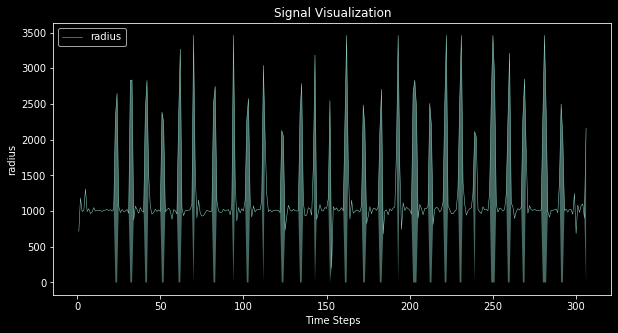

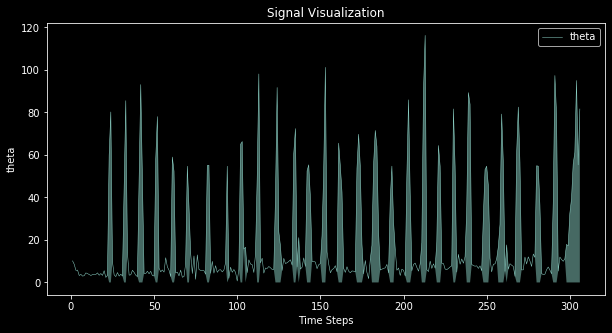

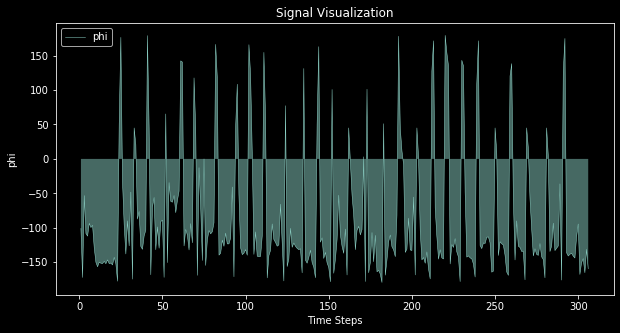

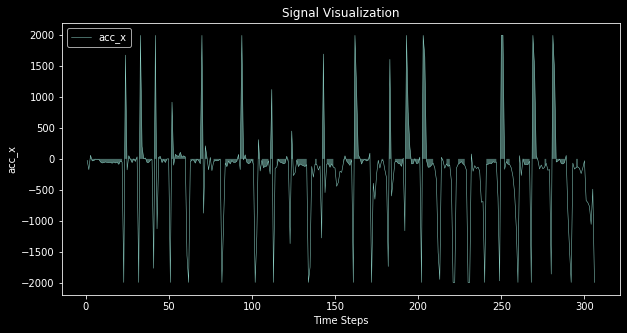

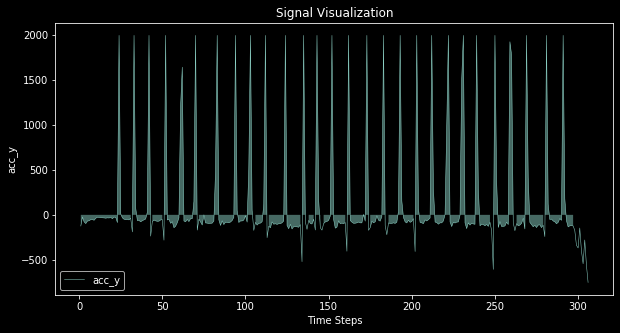

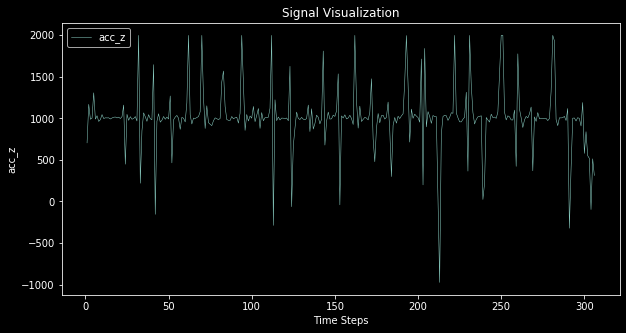

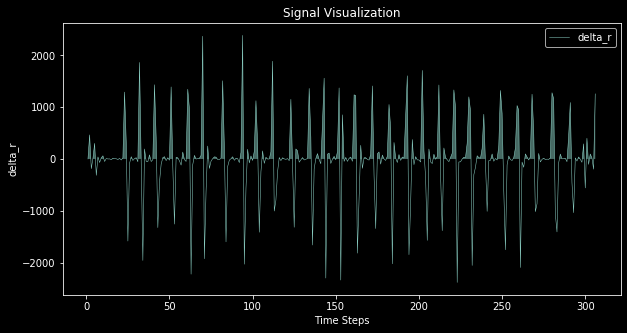

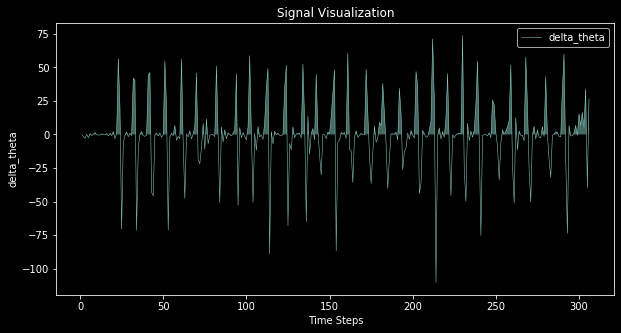

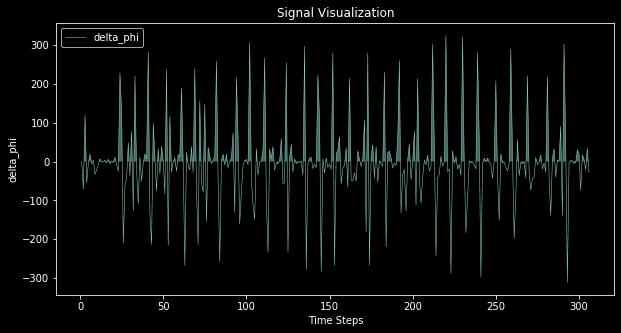

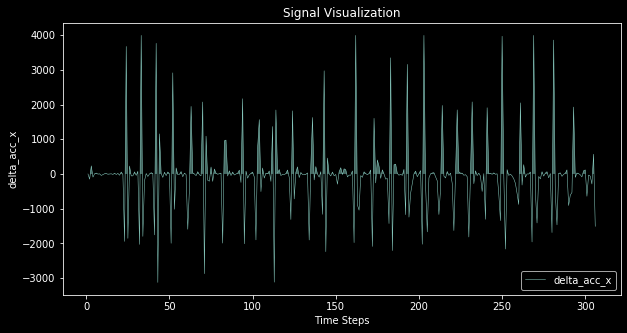

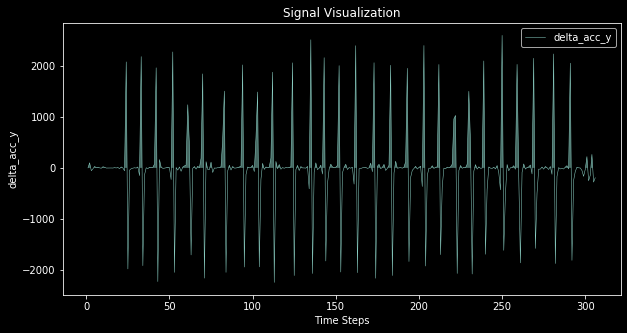

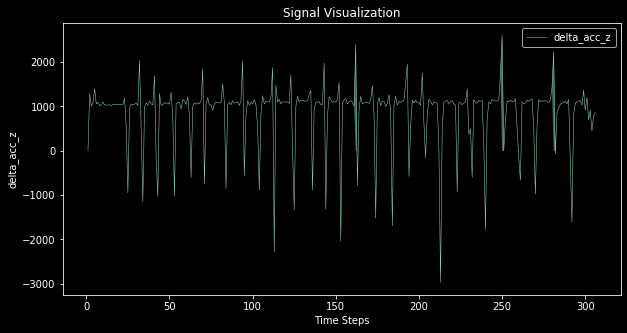

In [38]:
# visualization
visualize_together(angles_values)
visualize_together(acceleration_values)
visualize_together(change_angles_values)
visualize_together(change_acc_values)

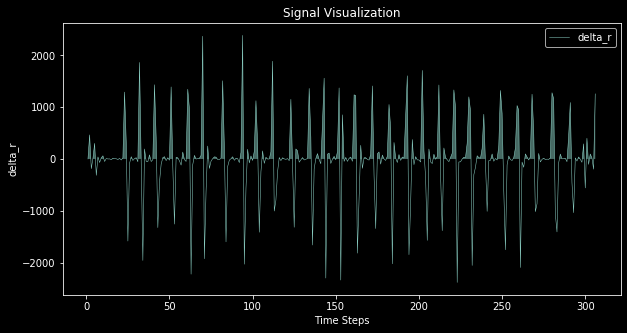

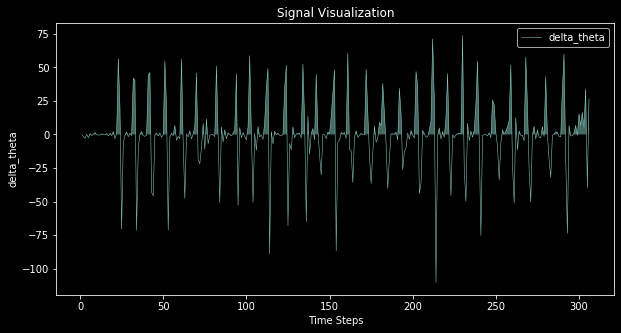

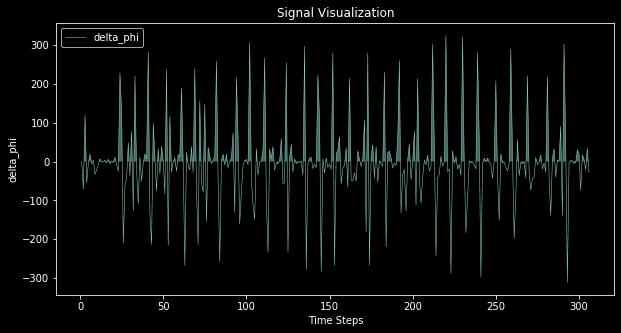

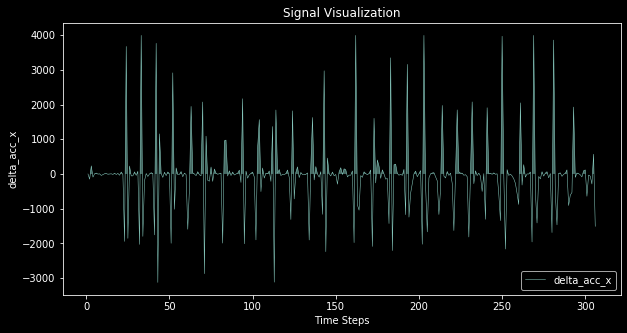

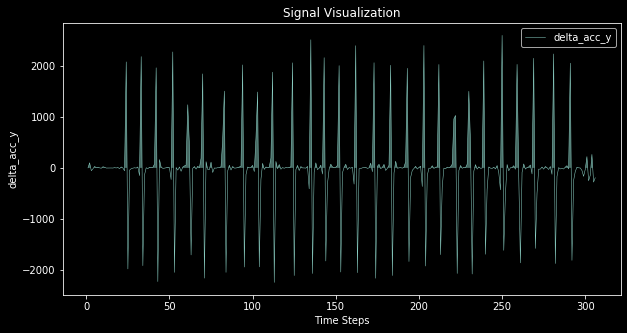

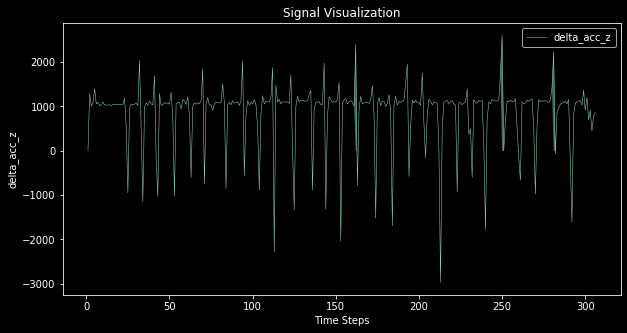

In [39]:
visualize_separetly(change_angles_values)
visualize_separetly(change_acc_values)

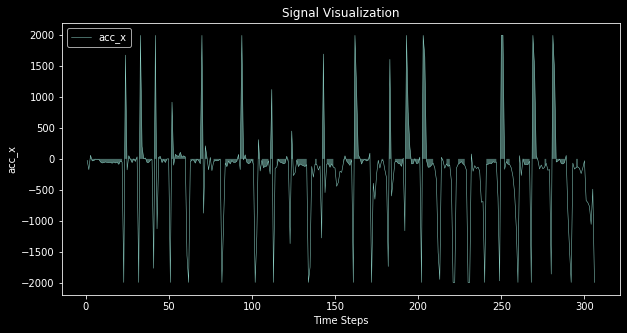

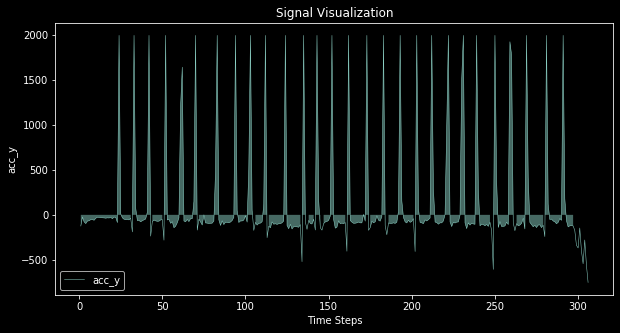

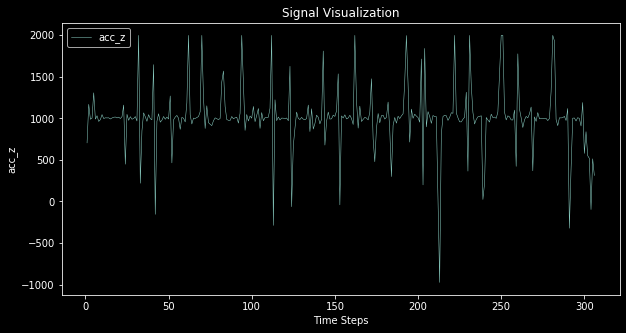

In [40]:
visualize_separetly(acceleration_values)

In [41]:
# import data
file = 'swipe_right_27.csv'
df_swipe_27 = pd.read_csv(file)
print(df_swipe_27.shape)
print(type(df_swipe_27['label'][0]))
df_swipe_27

(306, 24)
<class 'str'>


,id,r,theta,phi,acc_x,acc_y,acc_z,abs_a,g_x,g_y,...,delta_phi,delta_acc_x,delta_acc_y,delta_acc_z,delta_abs_acc,delta_g_x,delta_g_y,delta_g_z,delta_abs_g,label
0,1,716.224,10.156,-100.954,-24,-124,705,716.224,52990,65520,...,0.000,0,0,0,0.000,0,0,0,0,0
1,2,1181.133,8.552,-172.146,-174,-24,1168,1181.133,-14280,1260,...,-71.192,-150,100,1292,464.909,-67270,-64260,35700,-25905,0
2,3,993.902,5.693,-53.246,59,-79,989,993.902,-3920,-29820,...,118.900,233,-55,1013,-187.231,10360,-31080,-13440,3732,0
3,4,1008.187,5.814,-108.257,-32,-97,1003,1008.187,-5040,7350,...,-55.011,-91,-18,1082,14.285,-1120,37170,-8680,-22808,0
4,5,1309.119,3.260,-112.087,-28,-69,1307,1309.119,2450,6790,...,-3.830,4,28,1404,300.932,7490,-560,-1330,-1914,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,302,980.020,55.789,-150.588,-706,-398,551,980.020,-34160,51170,...,17.154,-34,-252,697,-104.793,5880,-31430,-112420,-47676,0
302,303,1074.998,61.192,-144.723,-769,-544,518,1074.998,-25200,28770,...,5.865,-63,-146,916,94.978,8960,-22400,10150,31333,0
303,304,1099.422,95.061,-165.240,-1059,-279,-97,1099.422,18270,-74270,...,-20.517,-290,265,447,24.424,43470,-103040,-4200,2728,0
304,305,902.027,55.339,-131.229,-489,-558,513,902.027,65590,1120,...,34.011,570,-279,792,-197.395,47320,75390,-2730,-22103,0


In [42]:
# Describe data
df_swipe_27.describe()

,id,r,theta,phi,acc_x,acc_y,acc_z,abs_a,g_x,g_y,...,delta_theta,delta_phi,delta_acc_x,delta_acc_y,delta_acc_z,delta_abs_acc,delta_g_x,delta_g_y,delta_g_z,delta_abs_g
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,3.060000e+02,306.000000
mean,153.500000,1320.443402,20.775366,-86.639265,-179.215686,123.081699,1008.604575,1320.443402,-7715.784314,5955.947712,...,0.233667,-0.190915,-6.450980,-2.052288,880.761438,4.710559,-727.679739,-406.503268,8.168954e+02,10.758170
std,88.478811,659.982055,25.333745,92.513773,770.645043,625.747121,362.451277,659.982055,64636.305092,80707.668735,...,25.508167,110.421031,1084.887281,864.271279,719.549384,732.258848,87842.275032,110642.302590,5.125159e+05,19778.352272
min,1.000000,210.192000,0.688000,-179.341000,-1998.000000,-752.000000,-974.000000,210.192000,-404180.000000,-352380.000000,...,-110.349000,-311.144000,-3128.000000,-2251.000000,-2971.000000,-2382.712000,-257460.000000,-549920.000000,-1.787660e+06,-51613.000000
25%,77.250000,996.148250,5.286750,-143.665500,-176.250000,-106.750000,971.000000,996.148250,-9450.000000,-5460.000000,...,-3.217000,-34.766750,-124.750000,-43.500000,1016.500000,-59.585500,-12425.000000,-7665.000000,-7.542500e+03,-7500.000000
50%,153.500000,1021.067000,8.255500,-125.457500,-72.500000,-79.000000,1004.500000,1021.067000,-1680.000000,-2065.000000,...,0.000000,-2.998000,-7.000000,0.500000,1081.000000,6.048500,-1050.000000,175.000000,2.590000e+03,27.500000
75%,229.750000,1153.305250,23.783000,-66.666250,-19.250000,-38.000000,1045.750000,1153.305250,2362.500000,6125.000000,...,4.763250,18.643750,61.000000,29.750000,1128.000000,102.312250,4935.000000,9012.500000,2.119250e+04,7204.250000
max,306.000000,3460.060000,116.299000,179.373000,1998.000000,1997.000000,1998.000000,3460.060000,253610.000000,643440.000000,...,73.882000,324.617000,3996.000000,2604.000000,2605.000000,2384.870000,432530.000000,629930.000000,2.331420e+06,51562.000000


In [43]:
# Get global metrix for swipe right
df_swipe_27.loc[df['label'] == 'swipe right'].describe()

,id,r,theta,phi,acc_x,acc_y,acc_z,abs_a,g_x,g_y,...,delta_theta,delta_phi,delta_acc_x,delta_acc_y,delta_acc_z,delta_abs_acc,delta_g_x,delta_g_y,delta_g_z,delta_abs_g
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,1.110000e+02,111.000000
mean,159.405405,1851.177324,39.783315,-27.298532,-317.657658,498.351351,1063.567568,1851.177324,-17353.063063,18843.243243,...,2.937000,11.367901,16.036036,8.171171,573.387387,20.307054,5589.279279,950.360360,-1.544982e+04,4461.549550
std,82.206655,845.792423,29.845851,126.578999,1245.113449,900.305753,564.468288,845.792423,103320.084484,131843.375468,...,39.206921,168.776541,1780.557195,1409.478897,1079.706123,1164.299072,137052.237378,181778.796653,8.411441e+05,26075.175738
min,22.000000,680.853000,2.029000,-179.341000,-1998.000000,-607.000000,-974.000000,680.853000,-404180.000000,-352380.000000,...,-110.349000,-311.144000,-3128.000000,-2251.000000,-2971.000000,-2382.712000,-257460.000000,-549920.000000,-1.787660e+06,-51613.000000
25%,88.500000,1058.990500,8.324500,-154.369500,-1417.500000,-85.500000,911.500000,1058.990500,-54110.000000,-12880.000000,...,-18.331500,-100.525500,-1329.500000,-474.000000,-108.000000,-900.433000,-74340.000000,-68285.000000,-4.445350e+05,-14105.500000
50%,163.000000,1641.931000,42.477000,-48.048000,-153.000000,-28.000000,1053.000000,1641.931000,-8540.000000,6650.000000,...,0.991000,-9.299000,-130.000000,10.000000,1031.000000,51.787000,-10500.000000,3920.000000,1.995000e+04,7375.000000
75%,230.500000,2501.808000,58.433500,89.203000,59.500000,1571.000000,1317.000000,2501.808000,7840.000000,32900.000000,...,35.672500,141.401500,1033.000000,774.500000,1167.500000,1015.046500,15540.000000,58345.000000,1.959650e+05,24699.000000
max,293.000000,3460.060000,116.299000,179.373000,1998.000000,1997.000000,1998.000000,3460.060000,253610.000000,643440.000000,...,73.882000,324.617000,3996.000000,2604.000000,2605.000000,2384.870000,432530.000000,629930.000000,2.331420e+06,51562.000000


In [44]:
# Get global metrix for non-swipes
df_swipe_27.loc[df['label'] == '0'].describe()

,id,r,theta,phi,acc_x,acc_y,acc_z,abs_a,g_x,g_y,...,delta_theta,delta_phi,delta_acc_x,delta_acc_y,delta_acc_z,delta_abs_acc,delta_g_x,delta_g_y,delta_g_z,delta_abs_g
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,150.138462,1018.333323,9.955456,-120.417836,-100.410256,-90.533333,977.317949,1018.333323,-2229.948718,-1379.897436,...,-1.305154,-6.770549,-19.251282,-7.871795,1055.728205,-4.167446,-4323.487179,-1178.871795,10076.410256,-2522.769231
std,91.894305,162.083475,13.399123,34.776644,193.520360,171.937632,152.187559,162.083475,20785.190865,15342.088562,...,12.033089,53.828949,228.720271,218.673223,261.076406,272.298298,38014.207777,22546.086175,107489.334390,14549.902931
min,1.000000,210.192000,0.688000,-178.319000,-1998.000000,-752.000000,-97.000000,210.192000,-169680.000000,-74270.000000,...,-86.886000,-283.809000,-1509.000000,-2047.000000,-2038.000000,-2337.087000,-255150.000000,-142170.000000,-996660.000000,-51394.000000
25%,73.500000,989.526000,4.734500,-142.548000,-123.500000,-113.500000,976.000000,989.526000,-3990.000000,-4830.000000,...,-2.033500,-20.775000,-55.500000,-21.000000,1042.000000,-45.280000,-4445.000000,-3465.000000,-3955.000000,-7084.500000
50%,150.000000,1009.730000,6.534000,-128.598000,-68.000000,-89.000000,1002.000000,1009.730000,-1120.000000,-2730.000000,...,-0.094000,-1.863000,-2.000000,0.000000,1088.000000,1.025000,-420.000000,140.000000,2030.000000,-1191.000000
75%,227.500000,1031.725500,9.719000,-108.528000,-26.000000,-66.000000,1020.500000,1031.725500,1540.000000,350.000000,...,1.404500,10.823500,35.000000,15.500000,1120.500000,36.801500,3745.000000,4830.000000,7980.000000,3151.500000
max,306.000000,2547.279000,101.248000,100.773000,198.000000,1997.000000,1535.000000,2547.279000,84490.000000,86030.000000,...,48.305000,279.092000,1157.000000,2010.000000,1548.000000,1370.624000,167860.000000,87290.000000,590590.000000,45287.000000


In [45]:
# matrix feature extraction
swipe_features = df_swipe_27.loc[df['label'] == 'swipe right'].describe()
nonswipe_features = df_swipe_27.loc[df['label'] == '0'].describe()

print("swipe_features.shape:", swipe_features.shape)
print("nonswipe_features.shape:", nonswipe_features.shape)

swipe_features.shape: (8, 23)
nonswipe_features.shape: (8, 23)


In [46]:
delta_df = swipe_features

# another = max(swipe_features, nonswipe_features)
def max_dfs_merge(df1, df2, delta_df):    
    for colm in df1.columns:
#         print(colm)
        for i in range(len(df1)):
#             print(i)
            if df1[colm][i] != 0 and df2[colm][i] != 0:
                delta_val = max(abs(df1[colm][i]), abs(df2[colm][i])) / min(abs(df1[colm][i]), abs(df2[colm][i]))
            else: 
                delta_val = 0
            delta_df[colm][i] = delta_val
    return delta_df
            
max_dfs_merge(swipe_features, nonswipe_features, delta_df)

,id,r,theta,phi,acc_x,acc_y,acc_z,abs_a,g_x,g_y,...,delta_theta,delta_phi,delta_acc_x,delta_acc_y,delta_acc_z,delta_abs_acc,delta_g_x,delta_g_y,delta_g_z,delta_abs_g
count,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,...,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757
mean,1.061723,1.817850,3.996132,4.411147,3.163598,5.504617,1.088251,1.817850,7.781822,13.655539,...,2.250309,1.679022,1.200501,1.038032,1.841213,4.872781,1.292771,1.240447,1.533266,1.768513
std,1.117845,5.218252,2.227448,3.639770,6.434018,5.236234,3.709030,5.218252,4.970851,8.593574,...,3.258259,3.135423,7.784868,6.445594,4.135594,4.275822,3.605290,8.062543,7.825373,1.792120
min,22.000000,3.239196,2.949128,1.005731,1.000000,1.238880,10.041237,3.239196,2.382013,4.744581,...,1.270044,1.096315,2.072896,1.099658,1.457802,1.019522,1.009053,3.868045,1.793651,1.004261
25%,1.204082,1.070200,1.758264,1.082930,11.477733,1.327485,1.070762,1.070200,13.561404,2.666667,...,9.014753,4.838773,23.954955,22.571429,9.648148,19.885888,16.724409,19.707071,112.398230,1.991037
50%,1.086667,1.626109,6.500918,2.676449,2.250000,3.178571,1.050898,1.626109,7.625000,2.435897,...,10.542553,4.991412,65.000000,0.000000,1.055286,50.523902,25.000000,28.000000,9.827586,6.192275
75%,1.013187,2.424878,6.012296,1.216641,2.288462,23.803030,1.290544,2.424878,5.090909,94.000000,...,25.398718,13.064305,29.514286,49.967742,1.041946,27.581661,4.149533,12.079710,24.557018,7.837220
max,1.044369,1.358336,1.148655,1.779971,10.090909,1.000000,1.301629,1.358336,3.001657,7.479251,...,1.529490,1.163118,3.453760,1.295522,1.682817,1.739989,2.576731,7.216520,3.947612,1.138561


In [47]:
delta_df

,id,r,theta,phi,acc_x,acc_y,acc_z,abs_a,g_x,g_y,...,delta_theta,delta_phi,delta_acc_x,delta_acc_y,delta_acc_z,delta_abs_acc,delta_g_x,delta_g_y,delta_g_z,delta_abs_g
count,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,...,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757,1.756757
mean,1.061723,1.817850,3.996132,4.411147,3.163598,5.504617,1.088251,1.817850,7.781822,13.655539,...,2.250309,1.679022,1.200501,1.038032,1.841213,4.872781,1.292771,1.240447,1.533266,1.768513
std,1.117845,5.218252,2.227448,3.639770,6.434018,5.236234,3.709030,5.218252,4.970851,8.593574,...,3.258259,3.135423,7.784868,6.445594,4.135594,4.275822,3.605290,8.062543,7.825373,1.792120
min,22.000000,3.239196,2.949128,1.005731,1.000000,1.238880,10.041237,3.239196,2.382013,4.744581,...,1.270044,1.096315,2.072896,1.099658,1.457802,1.019522,1.009053,3.868045,1.793651,1.004261
25%,1.204082,1.070200,1.758264,1.082930,11.477733,1.327485,1.070762,1.070200,13.561404,2.666667,...,9.014753,4.838773,23.954955,22.571429,9.648148,19.885888,16.724409,19.707071,112.398230,1.991037
50%,1.086667,1.626109,6.500918,2.676449,2.250000,3.178571,1.050898,1.626109,7.625000,2.435897,...,10.542553,4.991412,65.000000,0.000000,1.055286,50.523902,25.000000,28.000000,9.827586,6.192275
75%,1.013187,2.424878,6.012296,1.216641,2.288462,23.803030,1.290544,2.424878,5.090909,94.000000,...,25.398718,13.064305,29.514286,49.967742,1.041946,27.581661,4.149533,12.079710,24.557018,7.837220
max,1.044369,1.358336,1.148655,1.779971,10.090909,1.000000,1.301629,1.358336,3.001657,7.479251,...,1.529490,1.163118,3.453760,1.295522,1.682817,1.739989,2.576731,7.216520,3.947612,1.138561


In [61]:
max_vs = delta_df.max()
print(max_vs)

id                22.000000
r                  5.218252
theta              6.500918
phi                4.411147
acc_x             11.477733
acc_y             23.803030
acc_z             10.041237
abs_a              5.218252
g_x               13.561404
g_y               94.000000
g_z               98.083333
abs_g              4.215923
delta_r           50.523902
delta_theta       25.398718
delta_phi         13.064305
delta_acc_x       65.000000
delta_acc_y       49.967742
delta_acc_z        9.648148
delta_abs_acc     50.523902
delta_g_x         25.000000
delta_g_y         28.000000
delta_g_z        112.398230
delta_abs_g        7.837220
dtype: float64


In [62]:
delta_df[['g_x', 'g_y', 'g_z']]

,g_x,g_y,g_z
count,1.756757,1.756757,1.756757
mean,7.781822,13.655539,2.702589
std,4.970851,8.593574,7.511766
min,2.382013,4.744581,1.656805
25%,13.561404,2.666667,98.083333
50%,7.625000,2.435897,5.740741
75%,5.090909,94.000000,11.588571
max,3.001657,7.479251,7.414491


In [67]:
df_swipe_27.head(30)

,id,r,theta,phi,acc_x,acc_y,acc_z,abs_a,g_x,g_y,...,delta_phi,delta_acc_x,delta_acc_y,delta_acc_z,delta_abs_acc,delta_g_x,delta_g_y,delta_g_z,delta_abs_g,label
0,1,716.224,10.156,-100.954,-24,-124,705,716.224,52990,65520,...,0.000,0,0,0,0.000,0,0,0,0,0
1,2,1181.133,8.552,-172.146,-174,-24,1168,1181.133,-14280,1260,...,-71.192,-150,100,1292,464.909,-67270,-64260,35700,-25905,0
2,3,993.902,5.693,-53.246,59,-79,989,993.902,-3920,-29820,...,118.900,233,-55,1013,-187.231,10360,-31080,-13440,3732,0
3,4,1008.187,5.814,-108.257,-32,-97,1003,1008.187,-5040,7350,...,-55.011,-91,-18,1082,14.285,-1120,37170,-8680,-22808,0
4,5,1309.119,3.260,-112.087,-28,-69,1307,1309.119,2450,6790,...,-3.830,4,28,1404,300.932,7490,-560,-1330,-1914,0
5,6,993.203,3.817,-93.468,-4,-66,991,993.203,3850,350,...,18.619,24,3,1060,-315.916,1400,-6440,2940,-1820,0
6,7,1032.400,2.984,-99.637,-9,-53,1031,1032.400,8540,-630,...,-6.169,-5,13,1097,39.197,4690,-980,-4480,3131,0
7,8,964.476,3.170,-96.458,-6,-53,963,964.476,-5530,280,...,3.179,3,0,1016,-67.924,-14070,910,-2170,-2382,0
8,9,987.044,4.501,-129.237,-49,-60,984,987.044,-1260,-7840,...,-32.779,-43,-7,1037,22.568,4270,-8120,1330,1871,0
9,10,1047.771,4.168,-150.068,-66,-38,1045,1047.771,12320,5600,...,-20.831,-17,22,1105,60.727,13580,13440,5670,6094,0


In [ ]:
# motion = df_swipe_27.loc[df['label'] == 'swipe left']
# motion
# df_swipe_27['label'].unique()

### NN Algortithm

### Window slider 

In [ ]:
class WindowSlider(object):
    
    def __init__(self, window_size = 4):  
        ''' w - window_size - number of time-steps per prediction
            o - offset between last reading and temperature
            r - response_size - number of time steps to predict
            l - maximum length to slide - (#observation - w)
            p - final predictors - (#predictors * w) '''

        self.w = window_size
        self.o = 0
        self.r = 1       
        self.l = 0
        self.p = 0
        self.names = []
    
    
#     initialized vectore to 0
    def re_init(self, arr):
        arr = np.cumsum(arr)
        return arr - arr[0]
                

    def collect_windows(self, X, window_size=4, offset=0, previous_y=False):
        '''
        Input: X is the input matrix, each column is a variable
        Returns: diferent mappings window-output
        '''
        cols = len(list(X)) - 1
        N = len(X)
        
        self.o = offset
        self.w = window_size
        self.l = N - (self.w + self.r) + 1
        
        if not previous_y: self.p = cols * (self.w)
        if previous_y: self.p = (cols + 1) * (self.w)
        
        # Create the names of the variables in the window
        # Check first if we need to create that for the response itself
        if previous_y: x = cp.deepcopy(X)
        if not previous_y: x = X.drop(X.columns[-1], axis=1)  
        
        for j, col in enumerate(list(x)):        
                
            for i in range(self.w):
                
                name = col + ('(%d)' % (i+1))
                self.names.append(name)
        
        # Incorporate the timestamps where we want to predict
        for k in range(self.r):
            
            name = '∆t' + ('(%d)' % (self.w + k + 1))
            self.names.append(name)
            
        self.names.append('Y')
                
        df = pd.DataFrame(np.zeros(shape=(self.l, (self.p + self.r + 1))), 
                          columns=self.names)
        
        # Populate by rows in the new dataframe
        for i in range(self.l):
            
            slices = np.array([])
            
            # Flatten the lags of predictors
            for p in range(x.shape[1]):
            
                line = X.values[i:self.w + i, p]
                # Reinitialization at every window for ∆T
                if p == 0: line = self.re_init(line)
                    
                # Concatenate the lines in one slice    
                slices = np.concatenate((slices, line)) 
 
            # Incorporate the timestamps where we want to predict
            line = np.array([self.re_init(X.values[i:i+self.w+self.r, 0])[-1]])
            y = np.array(X.values[self.w + i + self.r - 1, -1]).reshape(1,)
            slices = np.concatenate((slices, line, y))
            
            # Incorporate the slice to the cake (df)
            df.iloc[i,:] = slices
            
        return df